# Henry Ezeanowi - 8900446

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Part 1

Load the Iris data

In [3]:
iris_df = load_iris(as_frame=True, return_X_y=False)

In [4]:
X = iris_df.data
y = iris_df.target
print(X)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

Checking the dependency between the indpendent features of the dataset

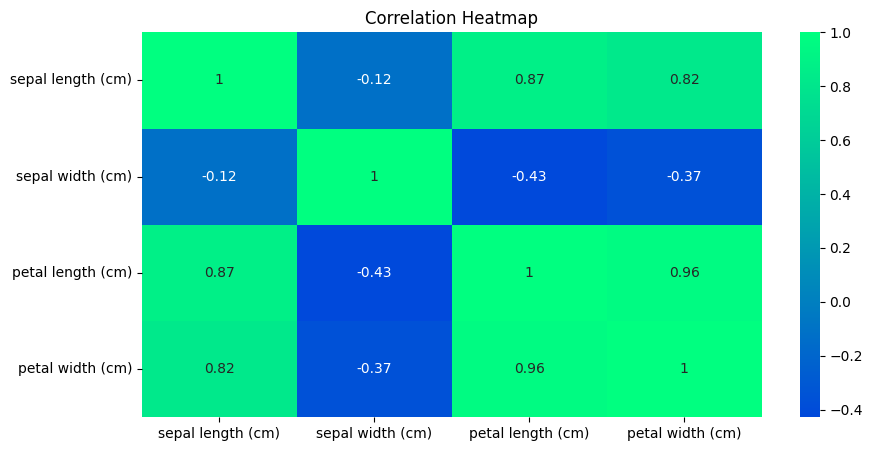

In [7]:
cor_mat = X.corr()
cor_mat
# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(cor_mat, annot=True, cmap='winter', center=0)
plt.title("Correlation Heatmap")
plt.show()

Dropping the features sepal length and sepal width columns for simplicity

In [8]:
data = X.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 1)
data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Preprocessing the data to to get the values in the same order

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data.columns = ['petal_length_(cm)', 'petal_width_(cm)']

data

,petal_length_(cm),petal_width_(cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


Draw elbow plot and from that figure out optimal value of k

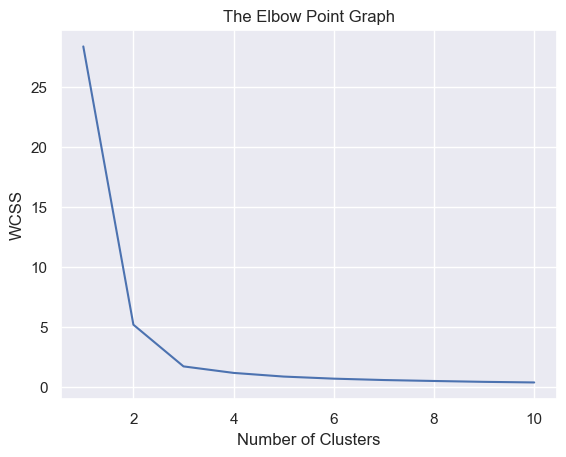

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=25, random_state=16)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Perform K-means clustering with 3 clusters on data

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=16)
kmeans.fit(data)

KMeans(n_clusters=3, n_init=10, random_state=16)

Return a label for each data point based on their cluster

In [12]:
y_pred = kmeans.fit_predict(data)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


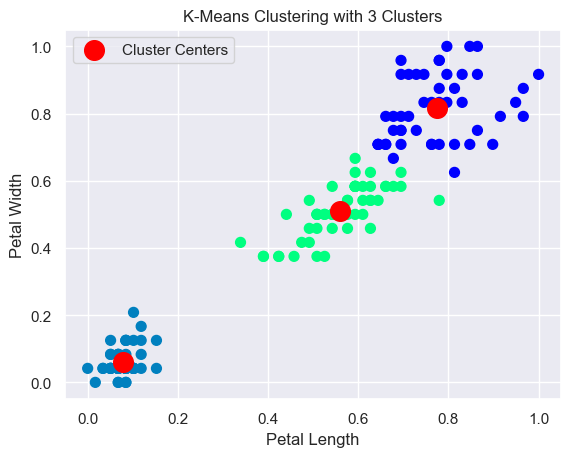

In [14]:
# Get the cluster labels
cluster_labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(data['petal_length_(cm)'], data['petal_width_(cm)'], c=cluster_labels, cmap='winter', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, label='Cluster Centers')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-Means Clustering with 3 Clusters')
plt.legend()
plt.show()

### Part 2

In [16]:
heart_df = pd.read_csv('heart.csv')
heart_df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Removing Outliers Using Z score

In [18]:
from scipy import stats

# Select numerical columns based on data types
num_columns = heart_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate z-scores for the numerical columns
z_scores = stats.zscore(heart_df[num_columns])

# Set the threshold for outlier detection
threshold = 3

# Find outlier indices
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

# Create a filtered DataFrame without outliers
df_filtered = heart_df[~outlier_indices]

Converting the text columns to numbers using label encoding / one hot encoding

In [19]:
# List of columns to one-hot encode
columns_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Perform one-hot encoding for the specified columns
encoded_df = pd.get_dummies(df_filtered, columns=columns_to_encode)

# Convert the One-hot-encoded boolean columns to integers 1 or 0
encoded_df.iloc[:, 6:] = encoded_df.iloc[:, 6:].astype(int)

# Print the DataFrame after one-hot encoding with True and False
encoded_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


Apply Scaling

In [20]:
# Define the target vector (dependent variable)
y = encoded_df['HeartDisease']
# Remove the target column from the features DataFrame
X = encoded_df.drop(columns=['HeartDisease'])
# Split the data into training and testing sets
X_trai, X_tes, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_trai)
X_test = scaler.transform(X_tes)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (719, 20)
X_test shape: (180, 20)
y_train shape: (719,)
y_test shape: (180,)


Using SVM model

In [21]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
# Predict using the standalone SVM model
svm_predict = svm_model.predict(X_test)
print(svm_predict)

[0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1
 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0]


In [23]:
# Calculate various performance metrics
svm_accuracy = accuracy_score(y_test, svm_predict)
svm_precision = precision_score(y_test, svm_predict)
svm_recall = recall_score(y_test, svm_predict)
svm_f1 = f1_score(y_test, svm_predict)
svm_confusion_matrix = confusion_matrix(y_test, svm_predict)

# Display the performance metrics in a concise format
svm_metrics = (
    f"Accuracy: {svm_accuracy:.2f}\n"
    f"Precision: {svm_precision:.2f}\n"
    f"Recall: {svm_recall:.2f}\n"
    f"F1 Score: {svm_f1:.2f}\n"
    f"Confusion Matrix:\n{svm_confusion_matrix}"
)

print("Standalone SVM Model Performance Metrics:")
print(svm_metrics)

Standalone SVM Model Performance Metrics:
Accuracy: 0.81
Precision: 0.77
Recall: 0.90
F1 Score: 0.83
Confusion Matrix:
[[59 25]
 [10 86]]


In [24]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

# Build a standalone SVM model
svm_model = SVC(kernel='linear', random_state=2)

# Define scoring metrics for cross-validation
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

# Define K-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=2)

# Apply cross-validation and calculate metrics
cv_results = cross_validate(svm_model, X_train, y_train, cv=k_fold, scoring=scoring)

# Display the cross-validation results
for metric in scoring.keys():
    print(f"{metric} (K-Fold Cross-Validation): Mean={cv_results['test_' + metric].mean():.2f}, Std Dev={cv_results['test_' + metric].std():.2f}")

Accuracy (K-Fold Cross-Validation): Mean=0.88, Std Dev=0.02
Precision (K-Fold Cross-Validation): Mean=0.89, Std Dev=0.01
Recall (K-Fold Cross-Validation): Mean=0.90, Std Dev=0.02
F1 (K-Fold Cross-Validation): Mean=0.89, Std Dev=0.01


Usisng Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print the calculated metrics
print("Random Forest Classifier Performance Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Confusion Matrix:\n", confusion_mat_rf)
print("Classification Report:\n", class_report_rf)

Random Forest Classifier Performance Metrics:
Accuracy: 0.8
Precision: 0.7777777777777778
Recall: 0.875
F1 Score: 0.823529411764706
Confusion Matrix:
 [[60 24]
 [12 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77        84
           1       0.78      0.88      0.82        96

    accuracy                           0.80       180
   macro avg       0.81      0.79      0.80       180
weighted avg       0.80      0.80      0.80       180



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate

# Create the Random Forest classifier
rf_model = RandomForestClassifier()

# Perform cross-validation and get accuracy scores
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Perform cross-validation and calculate multiple metrics
scoring_metrics_rf = ['accuracy', 'precision', 'recall', 'f1']
cv_results_rf = cross_validate(rf_model, X_train, y_train, cv=5, scoring=scoring_metrics_rf)

# Print accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", cv_scores_rf)

# Print average accuracy score
print("Average Accuracy Score:", cv_scores_rf.mean())

# Print other metrics from cross-validation
for metric in scoring_metrics_rf:
    print(f"Cross-Validation {metric.capitalize()} Scores:", cv_results_rf[f'test_{metric}'])
    print(f"Average {metric.capitalize()} Score:", cv_results_rf[f'test_{metric}'].mean())

Cross-Validation Accuracy Scores: [0.93055556 0.875      0.88888889 0.88194444 0.88111888]
Average Accuracy Score: 0.8915015540015541
Cross-Validation Accuracy Scores: [0.9375     0.875      0.88194444 0.875      0.88111888]
Average Accuracy Score: 0.8901126651126651
Cross-Validation Precision Scores: [0.9375     0.87654321 0.93055556 0.85227273 0.86046512]
Average Precision Score: 0.8914673217967792
Cross-Validation Recall Scores: [0.94936709 0.89873418 0.84810127 0.9375     0.93670886]
Average Recall Score: 0.9140822784810126
Cross-Validation F1 Scores: [0.94339623 0.8875     0.88741722 0.89285714 0.8969697 ]
Average F1 Score: 0.9016280569569961


Using Logistic Regressionn

In [27]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred_log = log_model.predict(X_test)
y_pred_log

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log)

# Calculate precision
precision = precision_score(y_test, y_pred_log)

# Calculate recall
recall = recall_score(y_test, y_pred_log)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_log)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_log)

# Generate classification report
class_report = classification_report(y_test, y_pred_log)

# Print the calculated metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", class_report)

Accuracy: 0.8055555555555556
Precision: 0.7747747747747747
Recall: 0.8958333333333334
F1 Score: 0.8309178743961353
Confusion Matrix:
 [[59 25]
 [10 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77        84
           1       0.77      0.90      0.83        96

    accuracy                           0.81       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.81      0.81      0.80       180



In [30]:
from sklearn.model_selection import cross_val_score, cross_validate

# Perform cross-validation and get accuracy scores
cv_scores = cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy')

# Perform cross-validation and calculate multiple metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(log_model, X_train, y_train, cv=5, scoring=scoring_metrics)

# Print accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", cv_scores)

# Print average accuracy score
print("Average Accuracy Score:", cv_scores.mean())

# Print other metrics from cross-validation
for metric in scoring_metrics:
    print(f"Cross-Validation {metric.capitalize()} Scores:", cv_results[f'test_{metric}'])
    print(f"Average {metric.capitalize()} Score:", cv_results[f'test_{metric}'].mean())

Cross-Validation Accuracy Scores: [0.91666667 0.83333333 0.90277778 0.86805556 0.86713287]
Average Accuracy Score: 0.8775932400932401
Cross-Validation Accuracy Scores: [0.91666667 0.83333333 0.90277778 0.86805556 0.86713287]
Average Accuracy Score: 0.8775932400932401
Cross-Validation Precision Scores: [0.93506494 0.8313253  0.94520548 0.85057471 0.84883721]
Average Precision Score: 0.8822015275335625
Cross-Validation Recall Scores: [0.91139241 0.87341772 0.87341772 0.925      0.92405063]
Average Recall Score: 0.9014556962025317
Cross-Validation F1 Scores: [0.92307692 0.85185185 0.90789474 0.88622754 0.88484848]
Average F1 Score: 0.8907799083059089


The models perform similarly in terms of accuracy and precision. I will consider Random Forest model with cross-validation a better choice because of the higher average recall

PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy.

In [31]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std)
X_std.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.428154,0.465900,0.849636,-0.550362,1.384320,-0.855469,-0.515943,0.515943,-1.077524,2.063325,-0.534905,-0.22955,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,-0.998888,1.134695
1,-0.475855,1.634714,-0.168122,-0.550362,0.752973,0.137516,1.938199,-1.938199,-1.077524,-0.484655,1.869492,-0.22955,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294
2,-1.745588,-0.118507,0.793612,-0.550362,-1.535661,-0.855469,-0.515943,0.515943,-1.077524,2.063325,-0.534905,-0.22955,-0.503821,-1.235023,2.041241,0.822945,-0.822945,-0.260184,-0.998888,1.134695
3,-0.581666,0.349019,0.149344,-0.550362,-1.141069,0.634008,1.938199,-1.938199,0.928054,-0.484655,-0.534905,-0.22955,-0.503821,0.809702,-0.489898,-1.215148,1.215148,-0.260184,1.001113,-0.881294
4,0.053200,1.050307,-0.028064,-0.550362,-0.588640,-0.855469,-0.515943,0.515943,-1.077524,-0.484655,1.869492,-0.22955,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,-0.998888,1.134695
5,-1.533965,-0.702913,1.316497,-0.550362,1.305402,-0.855469,-0.515943,0.515943,-1.077524,-0.484655,1.869492,-0.22955,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,-0.998888,1.134695


In [32]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_std)
X_pca.shape 

(899, 13)

In [33]:
X_pca = pd.DataFrame(X_pca)
X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.076329,-1.371946,-0.366686,-0.266779,-1.550713,-0.695173,-0.518826,1.088001,0.055632,-0.727057,0.459892,-0.481917,0.322624
1,1.482291,1.946285,-1.567709,-0.611478,2.722542,0.003551,-0.728085,0.386123,0.032121,-0.005042,-0.083110,-1.224236,1.465058
2,1.908796,-0.724799,1.450531,1.713999,-1.466029,-1.550059,-1.305906,0.221045,0.948490,-0.803388,-0.918767,0.383529,-0.354310
3,-1.381771,1.813626,-3.166445,0.827996,0.387985,0.058546,0.121701,-0.265566,0.120639,0.567580,0.032775,0.281648,0.455995
4,1.682918,-1.172728,0.529332,-0.738428,1.265155,0.178781,-1.505979,0.444528,-1.482897,0.780288,-0.627441,-0.035600,0.192498
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.569810,-0.705847,-0.188663,-2.002945,0.897904,-0.815891,2.206722,1.971230,2.939533,1.328161,-0.953556,1.114531,-0.867220
895,-1.794885,-0.352264,-0.040003,-0.293328,1.156553,-0.023654,1.612179,1.238346,-0.842758,-0.846254,0.030434,-2.158345,-0.671312
896,-2.424431,-0.812539,-1.468489,-0.182315,-0.028434,-0.310387,-0.023131,-0.151991,-0.152249,0.202531,-0.287003,0.656007,0.287619
897,2.153347,3.271955,-0.165156,-0.285106,-0.252594,-0.840456,1.070937,-0.353729,0.312126,-2.331793,0.145766,0.646172,0.902052


Split into train and test set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size = 0.8, random_state=33)

In [35]:
# Create the Random Forest classifier
rf_model = RandomForestClassifier()
# Fit the model to the training data
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print the calculated metrics
print("Random Forest Classifier Performance Metrics with PCA:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Confusion Matrix:\n", confusion_mat_rf)
print("Classification Report:\n", class_report_rf)

Random Forest Classifier Performance Metrics with PCA:
Accuracy: 0.7888888888888889
Precision: 0.7641509433962265
Recall: 0.8617021276595744
F1 Score: 0.8099999999999999
Confusion Matrix:
 [[61 25]
 [13 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76        86
           1       0.76      0.86      0.81        94

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180



In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate

# Create the Random Forest classifier
rf_model = RandomForestClassifier()

# Perform cross-validation with PCA-transformed features and get accuracy scores
cv_scores_rf_pca = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Perform cross-validation with PCA-transformed features and calculate multiple metrics
scoring_metrics_rf_pca = ['accuracy', 'precision', 'recall', 'f1']
cv_results_rf_pca = cross_validate(rf_model, X_train, y_train, cv=5, scoring=scoring_metrics_rf_pca)

# Print accuracy scores for each fold
print("Cross-Validation Accuracy Scores with PCA:", cv_scores_rf_pca)

# Print average accuracy score
print("Average Accuracy Score with PCA:", cv_scores_rf_pca.mean())

# Print other metrics from cross-validation
for metric in scoring_metrics_rf_pca:
    print(f"Cross-Validation {metric.capitalize()} Scores with PCA:", cv_results_rf_pca[f'test_{metric}'])
    print(f"Average {metric.capitalize()} Score with PCA:", cv_results_rf_pca[f'test_{metric}'].mean())

Cross-Validation Accuracy Scores with PCA: [0.875      0.84027778 0.88194444 0.86805556 0.85314685]
Average Accuracy Score with PCA: 0.8636849261849262
Cross-Validation Accuracy Scores with PCA: [0.86805556 0.84722222 0.88194444 0.85416667 0.86013986]
Average Accuracy Score with PCA: 0.8623057498057498
Cross-Validation Precision Scores with PCA: [0.87654321 0.8372093  0.89873418 0.8625     0.83908046]
Average Precision Score with PCA: 0.862813429837486
Cross-Validation Recall Scores with PCA: [0.8875     0.9        0.8875     0.87341772 0.92405063]
Average Recall Score with PCA: 0.8944936708860759
Cross-Validation F1 Scores with PCA: [0.88198758 0.86746988 0.89308176 0.86792453 0.87951807]
Average F1 Score with PCA: 0.8779963637510313


The model without PCA has a higher accuracy than the model with PCA.